In [1]:
import numpy as np
import pandas as pd
from RoutePlanner.Mesh import Mesh

In [2]:
IceExtent = {}
IceExtent['X']      = np.load('./resources/IceContent_X.npy') 
IceExtent['Y']      = np.load('./resources/IceContent_Y.npy') 
IceExtent['Values'] = np.load('./resources/IceContent_V.npy') 
IceExtent['Mask']   = np.load('./resources/IceContent_mask.npy') 
vls = IceExtent['Values']
vls[IceExtent['Mask']] = 1.0
IceExtent['Values'] = vls


Coastline = {}
Coastline['X']      = np.load('./resources/IceContent_X.npy') 
Coastline['Y']      = np.load('./resources/IceContent_Y.npy')
values = np.load('./resources/IceContent_V.npy'); values[values < 1] = 0
Coastline['Values'] = values

Currents = {}
Currents['X']  =  np.load('./resources/Current_X.npy') 
Currents['Y']  =  np.load('./resources/Current_Y.npy') 
Currents['Vx'] = np.load('./resources/Current_Vx.npy')
Currents['Vy'] = np.load('./resources/Current_Vy.npy')

In [3]:
MeshInfo = {}
MeshInfo['Xmin'] = 260
MeshInfo['Xmax'] = 360
MeshInfo['Ymin'] = -75
MeshInfo['Ymax'] = -40
MeshInfo['dx']   = 5
MeshInfo['dy']   = 2.5

MeshInfo['CoastMask'] = {}
MeshInfo['CoastMask']['X']          = Coastline['X'] 
MeshInfo['CoastMask']['Y']          = Coastline['Y'] 
MeshInfo['CoastMask']['Mask']       = Coastline['Values'].astype(bool)
MeshInfo['CoastMask']['Split']      = False
MeshInfo['CoastMask']['SplitDepth'] = 1

MeshInfo['IceExtent'] = {}
MeshInfo['IceExtent']['X']          = IceExtent['X'] 
MeshInfo['IceExtent']['Y']          = IceExtent['Y'] 
MeshInfo['IceExtent']['Values']     = IceExtent['Values']
MeshInfo['IceExtent']['Mask']       = IceExtent['Mask']
MeshInfo['IceExtent']['Split']      = False
MeshInfo['IceExtent']['SplitDepth'] = 1
MeshInfo['IceExtent']['SplitDiff']  = 0.1
MeshInfo['IceExtent']['MaxProportion'] = 0.8

MeshInfo['Currents'] = {}
MeshInfo['Currents']['X']  = Currents['X'] 
MeshInfo['Currents']['Y']  = Currents['Y']
MeshInfo['Currents']['Vx'] = Currents['Vx'] 
MeshInfo['Currents']['Vy'] = Currents['Vy'] 




### Generating Mesh from Land & Ice Content

In [4]:
mesh = Mesh(MeshInfo)
mesh.IceInformation()
mesh.VectorInformation()


=============== Initialising Mesh ================
Xmin=260,Xmax=360,dX=5  Ymin=-75,Ymax=-40,dY=2.5

============ GRIDDING LAND INFORMATION ===========
~~~~~~~~ Initialising Original Mask Array ~~~~~~~~

============ GRIDDING ICE INFORMATION ===========
~~~~~~~~ Initialising Original Mask Array ~~~~~~~~

============ GRIDDING Current Data ===============


### Plotting Generated Mesh

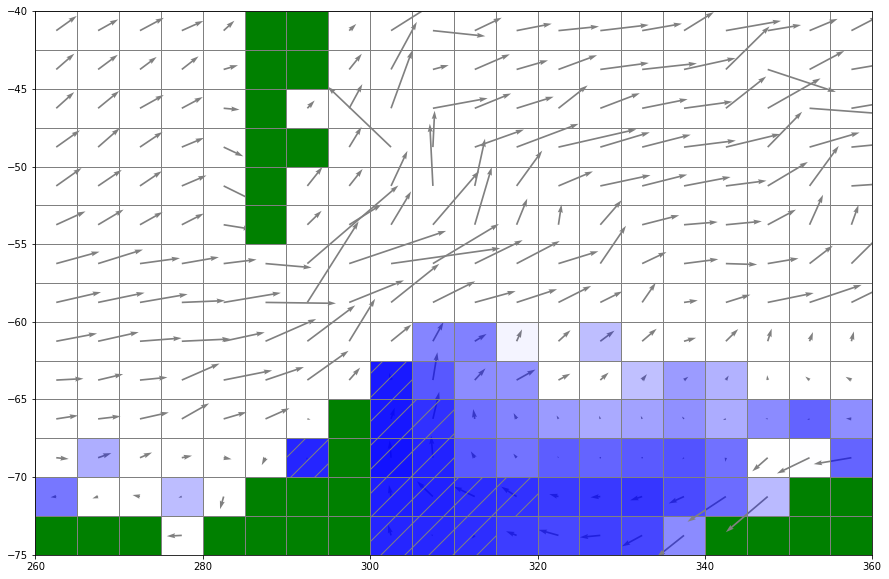

In [5]:
from RoutePlanner.Plot import PlotMesh, OptimisedPaths
PlotMesh(mesh)

# Optimisation

In [6]:
from RoutePlanner.Optimisation import TravelTime
from RoutePlanner.Function import NewtonianDistance, SmoothedNewtonianDistance
OptInfo = {}
OptInfo['WayPoints']            = pd.read_csv('./resources/WayPoints.csv') 
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3*(1000/(60*60))

In [7]:
TT = TravelTime(mesh,OptInfo)
TT.Dijkstra(verbrose=True)

=== Processing Waypoint = Falklands ===


RuntimeError: Failed to converge after 350 iterations, value is nan.

In [ ]:
OptimisedPaths(mesh,TT,TT.Paths,routepoints=True)

In [ ]:
OptimisedPaths(mesh,TT,[TT.Paths[2]],routepoints=True)